In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime

In [11]:
from matplotlib import rc
from matplotlib import text

In [2]:
datA = pd.read_csv("PartA.csv")
datB = pd.read_csv("PartB.csv")

In [ ]:
dl =0
for i in datA.duplicated():
    if i:
        dl+=1
        
print(dl)

In [ ]:
len(datB)+dl

In [ ]:
datB.loc[(datB.Product=='TXX5Q') & (datB.Channel=='A' ) ].sort_values(by=['WeekStart']) #& (datB.WeekStart=='2015-01-05')

In [ ]:
datA.loc[(datA.Product=='TXX5Q') & (datA.Channel=='A' ) ].sort_values(by=['WeekStart']) #& (datA.WeekStart=='2015-01-05')

In [3]:
result = pd.merge(datA.drop_duplicates(), datB, on=['Product', 'Channel','WeekStart'])

In [4]:
result = result.sort_values(by=['WeekStart'])

In [5]:
result['dWeekStart']=pd.to_datetime(result.WeekStart)

In [ ]:
result.loc[(result.Product=='TXX5Q') &  (result.Channel=='A' )].sort_values(by=['WeekStart'])[:5]

In [ ]:
result.head()

In [6]:
result.columns

Index(['Product', 'Channel', 'WeekStart', 'QuantitySold', 'Price',
       'isPromoPeriod', 'TV', 'Online', 'StoresAvailability', 'dWeekStart'],
      dtype='object')

In [57]:
result = result.replace([np.inf, -np.inf], 0) 

In [58]:
result.describe()

,QuantitySold,Price,TV,Online,StoresAvailability,lQuantitySold,lTV,lOnline
count,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000
mean,6748.426488,5.206341,28675.595740,5463.236835,43.274434,6.714203,2.076715,1.807204
std,9092.318715,3.209204,64924.912952,16464.797405,31.471607,2.624704,4.536996,3.826652
min,1.000000,0.973913,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,89.000000,3.249236,0.000000,0.000000,13.000000,4.488636,0.000000,0.000000
50%,376.000000,3.990769,0.000000,0.000000,43.000000,5.929589,0.000000,0.000000
75%,13507.000000,5.992857,0.000000,0.000000,67.000000,9.510963,0.000000,0.000000
max,58748.000000,15.369521,267964.040000,110574.961000,100.000000,10.981012,12.498608,11.613449


In [48]:
result['lOnline']=np.log(result.Online)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [47]:
result['lTV']=np.log(result.TV)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [22]:
result['lQuantitySold']=np.log(result.QuantitySold)

In [7]:
def plot_all(data):
    varlist = data.select_dtypes(include='number').columns
    print("N_num_cols=",len(varlist))
    nbins=1
    for i in varlist:
        plt.figure(i) 
        nbins = 40
        #sns.distplot(data[i], bins=nbins, kde=False)
        sns.distplot(data[i])
        plt.savefig("Plots/"+i+".png", transparent=True)
        plt.close(i)

In [ ]:
plot_all(result)

In [8]:
act_type = list(result.Product.value_counts().index)

In [9]:
act_type

['TXX06',
 'TXX00',
 'TXZ06',
 'TXQ0T',
 'TXX5Q',
 'TXQTZ',
 'TXQT7',
 'TXXX0',
 'TZQAQ',
 'TXQQX']

In [107]:
result.groupby('Product').count()

,Channel,WeekStart,QuantitySold,Price,isPromoPeriod,TV,Online,StoresAvailability,dWeekStart,lQuantitySold,lTV,lOnline
Product,,,,,,,,,,,,
TXQ0T,686,686,686,686,686,686,686,686,686,686,686,686
TXQQX,225,225,225,225,225,225,225,225,225,225,225,225
TXQT7,601,601,601,601,601,601,601,601,601,601,601,601
TXQTZ,620,620,620,620,620,620,620,620,620,620,620,620
TXX00,766,766,766,766,766,766,766,766,766,766,766,766
TXX06,793,793,793,793,793,793,793,793,793,793,793,793
TXX5Q,684,684,684,684,684,684,684,684,684,684,684,684
TXXX0,522,522,522,522,522,522,522,522,522,522,522,522
TXZ06,693,693,693,693,693,693,693,693,693,693,693,693


In [109]:
result['Product'].value_counts()

TXX06    793
TXX00    766
TXZ06    693
TXQ0T    686
TXX5Q    684
TXQTZ    620
TXQT7    601
TXXX0    522
TZQAQ    375
TXQQX    225
Name: Product, dtype: int64

In [110]:
df = result.copy()

In [114]:
df.head()

,Product,Channel,WeekStart,QuantitySold,Price,isPromoPeriod,TV,Online,StoresAvailability,dWeekStart,...,Product_TXQ0T,Product_TXQQX,Product_TXQT7,Product_TXQTZ,Product_TXX00,Product_TXX06,Product_TXX5Q,Product_TXXX0,Product_TXZ06,Product_TZQAQ
1451,TXXX0,B,2015-01-05,126,4.870874,False,0.0,0.0,41,2015-01-05,...,0,0,0,0,0,0,0,1,0,0
4648,TXX5Q,A,2015-01-05,29077,3.452022,False,0.0,0.0,48,2015-01-05,...,0,0,0,0,0,0,1,0,0,0
1669,TXQ0T,C,2015-01-05,16847,4.831435,True,0.0,0.0,94,2015-01-05,...,1,0,0,0,0,0,0,0,0,0
2272,TXX06,C,2015-01-05,22098,4.568162,True,0.0,0.0,96,2015-01-05,...,0,0,0,0,0,1,0,0,0,0
4753,TXXX0,C,2015-01-05,17459,4.561161,True,0.0,0.0,88,2015-01-05,...,0,0,0,0,0,0,0,1,0,0


In [121]:
for i in df.filter(like='Product_', axis=1).columns:
    print(df[i].sum())

686
225
601
620
766
793
684
522
693
375


In [125]:
df.filter(like='Product_', axis=1).sum()

pandas.core.series.Series

In [113]:
df = pd.concat([df,pd.get_dummies(df['Product'], prefix='Product')],axis=1) 

In [13]:
chans = list(set(result.Channel))

In [14]:
chans.sort()

In [15]:
chans

['A', 'B', 'C', 'D', 'E', 'F']

In [16]:
barA = []
barB = []
barC = []
barD = []
barE = []
barF = []
for i in act_type: #['TXX06','TXX00']: # 
    print(i)
    for j in chans:
        rr = result.loc[(result.Product==i)& (result.Channel==j)].Channel.count()
        if j=='A':barA.append(rr)
        elif j=='B':barB.append(rr)
        elif j=='C':barC.append(rr)
        elif j=='D':barD.append(rr)    
        elif j=='E':barE.append(rr)
        elif j=='F':barF.append(rr)            

TXX06
TXX00
TXZ06
TXQ0T
TXX5Q
TXQTZ
TXQT7
TXXX0
TZQAQ
TXQQX


In [ ]:
barA

In [ ]:
barB

0 793
1 766
2 693
3 686
4 684
5 620
6 601
7 522
8 375
9 225


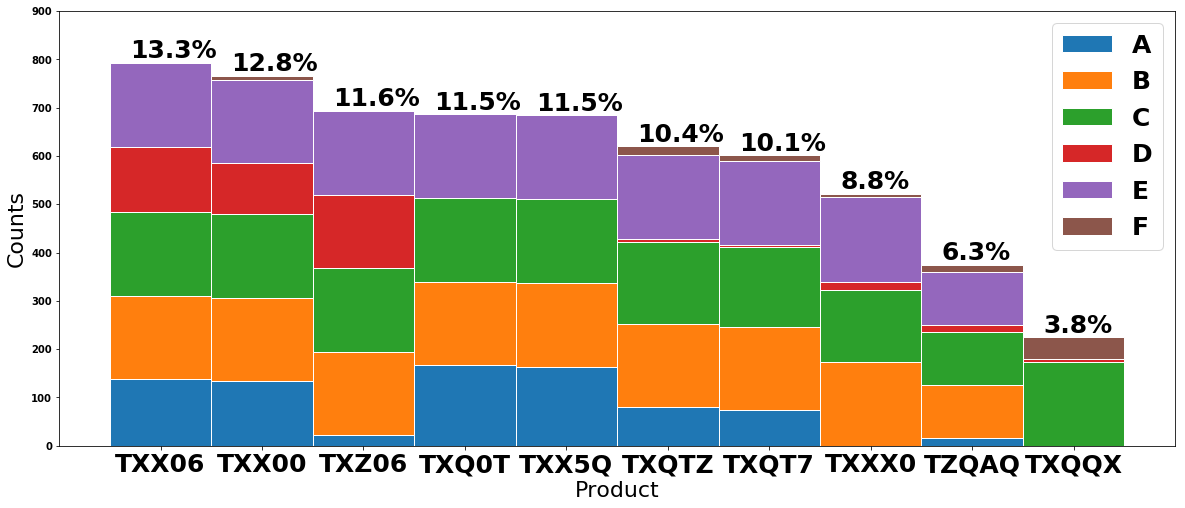

In [17]:
rc('font', weight='bold')
barsAB = np.add(barA, barB).tolist()
barsAC = np.add(barsAB, barC).tolist()
barsAD = np.add(barsAC, barD).tolist()
barsAE = np.add(barsAD, barE).tolist()
barsAF = np.add(barsAE, barF).tolist()


# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9]
 
# Names of group and bar width
names = act_type
barWidth = 1
fig = plt.figure(figsize=(20, 8))
# Create brown bars
plt.bar(r, barA,  edgecolor='white', width=barWidth)#color='#7f6d5f',
# Create green bars (middle), on top of the firs ones
plt.bar(r, barB, bottom=barA,  edgecolor='white', width=barWidth)#color='#557f2d',
# Create green bars (top)
plt.bar(r, barC, bottom=barsAB,  edgecolor='white', width=barWidth) 
plt.bar(r, barD, bottom=barsAC,  edgecolor='white', width=barWidth)
plt.bar(r, barE, bottom=barsAD,  edgecolor='white', width=barWidth)
plt.bar(r, barF, bottom=barsAE,  edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold',fontsize=25)
plt.xlabel("Product",fontsize=22)
plt.ylabel("Counts",fontsize=22)
plt.ylim(0,900)
plt.legend(chans,prop={'size': 25})
# Show graphic
for i, v in enumerate(barsAF):
    print(i,v)
    val = (v/len(result)*100)
    val = "%.1f" % round(val,1)
    txt = val + '%' #.round(1)
    plt.text(i-0.3, v+10, txt,fontsize=25) #, bbox=dict(facecolor='red', alpha=0.5)
    #plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
#plt.show()
plt.savefig("Plots/activity_chan.png", transparent=True)


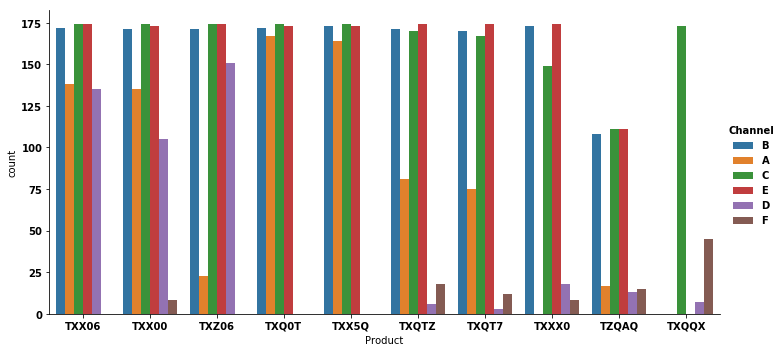

In [18]:
g = sns.catplot(x="Product", kind="count", data=result,hue="Channel",height=5,aspect=2,order=act_type)
#g2 = sns.catplot(x="Product", kind="count", data=result.loc[result.Channel=='A'],height=5,aspect=2,order=act_type)

In [99]:
#g = sns.catplot(x="Online", kind="count", data=result,height=5,aspect=2,order=act_type)
def sum_plot(var):
    plt.figure(figsize=(15,8))
    g = sns.barplot(x="Product", y=var, data=result, estimator=sum,order=act_type,hue='isPromoPeriod')
    plt.savefig("Plots/sum_"+var+"_prod.png", transparent=True)


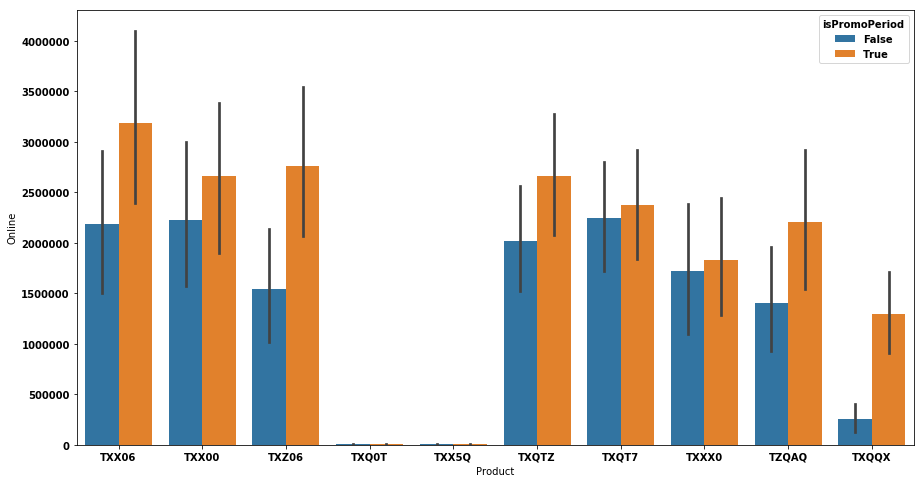

In [100]:
sum_plot('Online')

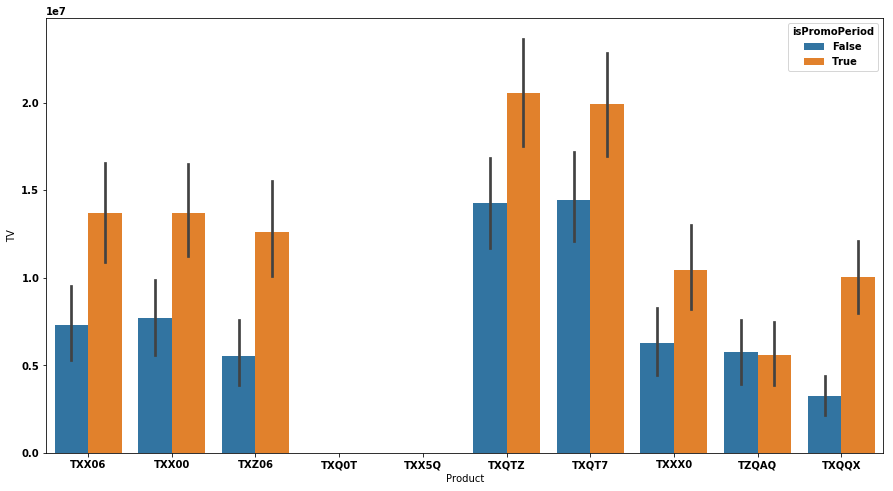

In [101]:
sum_plot('TV')

Rectangle(xy=(-0.4, 0), width=0.8, height=793, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=766, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=693, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=686, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=684, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=620, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=601, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=522, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=375, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=225, angle=0)


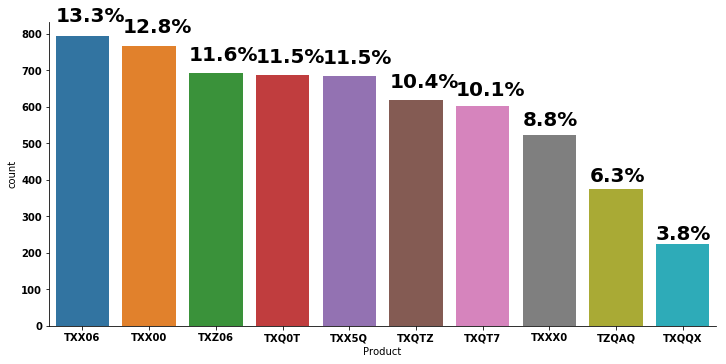

In [19]:
g = sns.catplot(x="Product", kind="count", data=result,height=5,aspect=2,order=act_type)
#g = sns.catplot(x="Product", kind="count", data=result,hue="Channel",height=5,aspect=2,order=act_type) #
for p in g.ax.patches:
    print(p)
    txt = str((p.get_height()/len(result)*100).round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = 1.05*p.get_height()
    g.ax.text(txt_x,txt_y,txt,fontsize=20)
plt.savefig("Plots/activity.png", transparent=True)

In [20]:
def prod_feature(ds,var, hvar='',k ="box",act_type=act_type):
    plt.figure(var) 
    if k=="violin": ext = '_v'
    else:ext =''
        
    if not hvar:
        print("no")
    #sns.catplot(x="Product", y=var,   hue=hvar, kind="box",data=ds)
    #sns.catplot(x="Product", y=var,  kind="box",data=ds,height=5,aspect=2)
        sns.catplot(x="Product", y=var,  kind=k,data=ds,height=5,aspect=2,order=act_type)
        ext2=''
    else:
        print(hvar)
        ext2=hvar
        sns.catplot(x="Product", y=var,  hue=hvar, kind=k,data=ds,height=5,aspect=2,order=act_type)
    plt.savefig("Plots/prod_"+var+ext2+ext+".png", transparent=True)
    plt.close(var)
    

isPromoPeriod


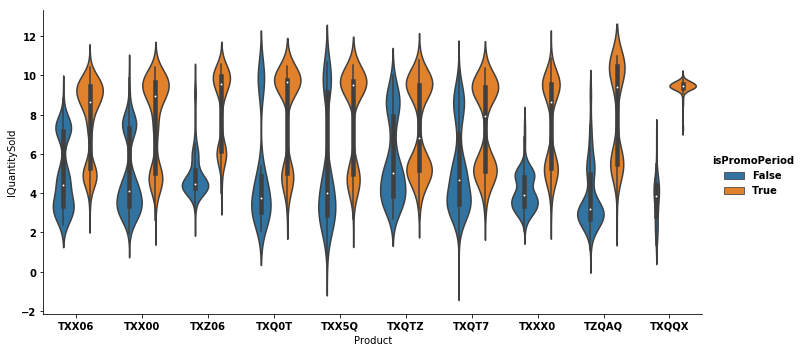

In [23]:
prod_feature(result, 'lQuantitySold','isPromoPeriod','violin')

In [24]:
def plot_dist_type(data,varlist,acttype = act_type):
    for i in varlist:
        print("variable",i)
        plt.figure(i) 
        for j in acttype: 
            print("product",j)
            sns.distplot(data.loc[data.Product==j][i], kde=False,label=j)#.set(xlim=(0.1))
            #sns.kdeplot(data.loc[data.activity==j][i])
            #plt.hist(data.loc[data.activity==j][i],10,histtype=u'step',label=i,density=1)
        plt.legend(prop={'size': 12})
        plt.yscale('log') #,hist=True
        plt.savefig("Plots/prod/"+i+".png", transparent=True)


variable QuantitySold
product TXX06
product TXX00
product TXZ06
product TXQ0T
product TXX5Q
product TXQTZ
product TXQT7
product TXXX0
product TZQAQ
product TXQQX


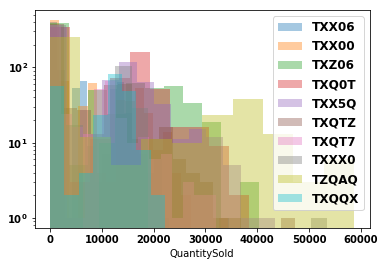

In [27]:
#plot_dist_type(result,[ 'QuantitySold', 'Price', 'TV', 'Online', 'StoresAvailability'])
plot_dist_type(result,[ 'QuantitySold'])

In [42]:
def scat_plt(data,varX,varY,varH=''):
    plt.figure(varX) 
    if not varH:
        print("no")
        sns.scatterplot(x=data[varX], y=data[varY])
        ext2=''
    else:
        print(varH)
        ext2=varH
        sns.scatterplot(x=data[varX], y=data[varY], hue=data[varH])
    plt.savefig("Plots/scat_"+varX+ext2+".png", transparent=True)
    plt.close(varH)    

Product


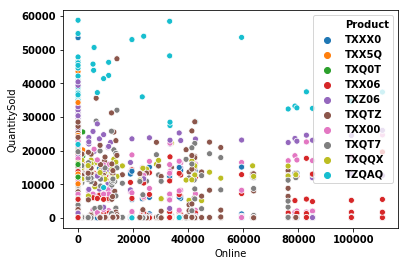

In [55]:
scat_plt(result,'Online','QuantitySold','Product') #,'Product'&(result.Product=='TXX5Q').loc[(result.isPromoPeriod==False) ]

In [35]:
result.columns

Index(['Product', 'Channel', 'WeekStart', 'QuantitySold', 'Price',
       'isPromoPeriod', 'TV', 'Online', 'StoresAvailability', 'dWeekStart',
       'lQuantitySold'],
      dtype='object')

In [36]:
def plot_over_time(data,var='QuantitySold'):
    df1= data.sort_values('WeekStart', ascending=True)
    plt.plot(df1['WeekStart'], df1[var],label=var)
    plt.xticks(rotation='vertical')
    plt.legend(loc="lower left")

In [37]:
#pd.to_datetime(result.WeekStart)

In [38]:
import matplotlib.dates as mdates

def plot_over_time_1(data,var='QuantitySold'):

    df1= data.sort_values('WeekStart', ascending=True)
    fig, ax = plt.subplots()
    #ax.plot(pd.to_datetime(df1['date']), df1[gas_type])
    ax.plot(pd.to_datetime(df1['WeekStart']), df1[var])
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%W'))
    ax.grid(True)
    fig.autofmt_xdate()
    #plt.savefig("Plots/"+name+".png", transparent=True)
    #plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


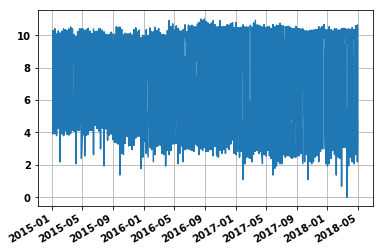

In [39]:
plot_over_time_1(result,'lQuantitySold')

In [40]:
type(pd.to_datetime(result.WeekStart[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [62]:
def time_plot(varY,varH):
    fig, ax = plt.subplots()
    sns.lineplot(x="dWeekStart", y=varY,hue=varH,err_style=None, data=result) # lw=1, ,hue="Product", style="Product",
    fig.autofmt_xdate()
    plt.savefig("Plots/time_"+varY+varH+".png", transparent=True)

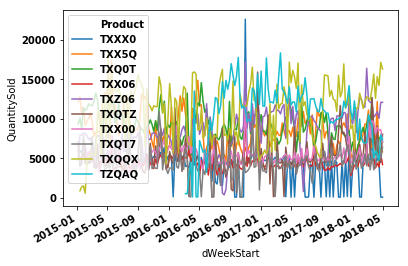

In [63]:
time_plot('QuantitySold','Product')

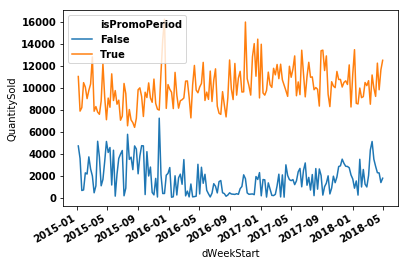

In [64]:
time_plot('QuantitySold','isPromoPeriod')

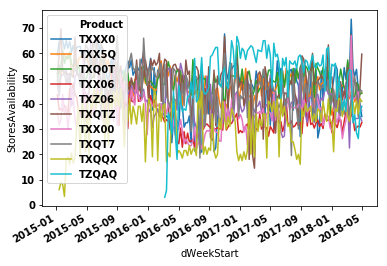

In [79]:
time_plot('StoresAvailability','Product')

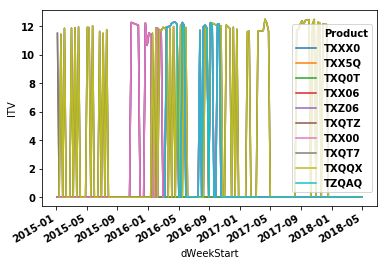

In [81]:
time_plot('lTV','Product')

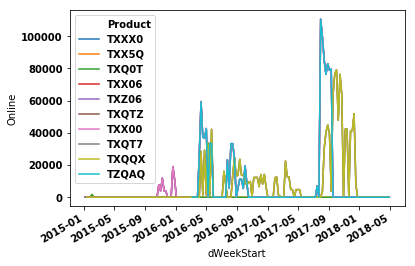

In [83]:
time_plot('Online','Product')

In [86]:
result.loc[result.Product==].Online.sum()

32588207.722999997

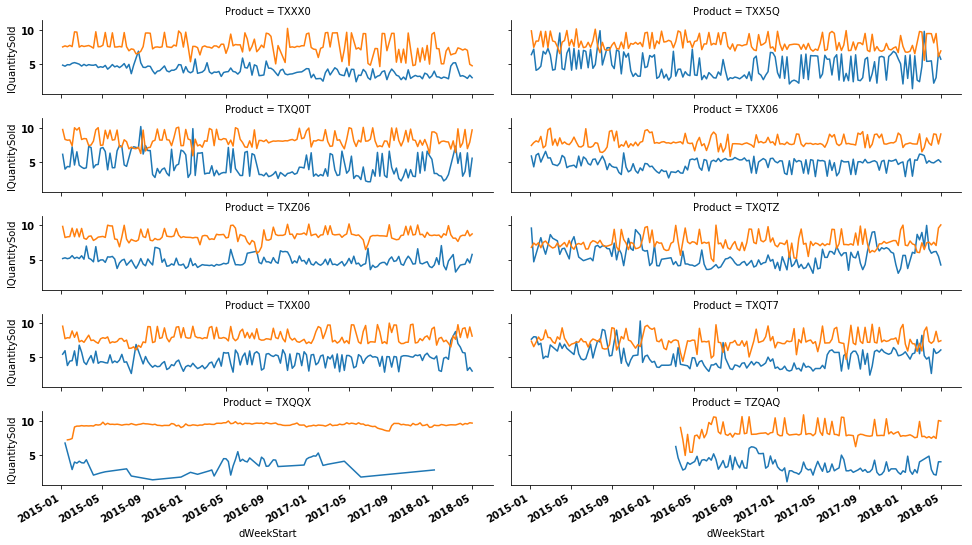

In [78]:
#fig, ax = plt.subplots()
g = sns.FacetGrid(result, col='Product', row_order=act_type,
                  height=1.7, aspect=4,col_wrap=2,hue='isPromoPeriod')
#g.map(sns.lineplot(x="dWeekStart", y='QuantitySold',hue='isPromoPeriod',err_style=None)); #, data=result
g.map(sns.lineplot,'dWeekStart', 'lQuantitySold',err_style=None)
#for pr in act_type:
#    sns.lineplot(x="dWeekStart", y='QuantitySold',hue='isPromoPeriod',err_style=None, data=result.loc[result.Product==pr]) # lw=1, ,hue="Product", style="Product",
#fig.autofmt_xdate()
g.fig.autofmt_xdate()
plt.savefig("Plots/times_lQuantitySold_prod_promo.png", transparent=True)